In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("superstore.csv")
df


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52


In [3]:
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=51290, step=1)

In [5]:
 df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Dropping unnecessary columns to simplify the analysis
columns_to_drop = ['记录数', 'Row.ID', 'Order.ID', 'Customer.ID', 'Product.ID', 'Market2']
df_cleaned = df.drop(columns=columns_to_drop)

In [8]:
df_cleaned

,Category,City,Country,Customer.Name,Discount,Market,Order.Date,Order.Priority,Product.Name,Profit,...,Region,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,weeknum
0,Office Supplies,Los Angeles,United States,Lycoris Saunders,0.0,US,2011-01-07 00:00:00.000,High,Xerox 225,9.3312,...,West,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,2
1,Office Supplies,Los Angeles,United States,Mark Van Huff,0.0,US,2011-01-21 00:00:00.000,Medium,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,...,West,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,4
2,Office Supplies,Los Angeles,United States,Chad Sievert,0.0,US,2011-08-05 00:00:00.000,Medium,"Adams Phone Message Book, Professional, 400 Me...",9.8418,...,West,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,32
3,Office Supplies,Los Angeles,United States,Chad Sievert,0.0,US,2011-08-05 00:00:00.000,Medium,Xerox 1913,53.2608,...,West,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,32
4,Office Supplies,Los Angeles,United States,Arthur Prichep,0.0,US,2011-09-29 00:00:00.000,High,Xerox 223,3.1104,...,West,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,Alice McCarthy,0.2,US,2014-12-03 00:00:00.000,High,Satellite Sectional Post Binders,22.5732,...,West,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,49
51286,Office Supplies,Los Angeles,United States,Alice McCarthy,0.2,US,2014-12-03 00:00:00.000,High,Staples,3.1584,...,West,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,49
51287,Office Supplies,Los Angeles,United States,Hallie Redmond,0.2,US,2014-12-18 00:00:00.000,Medium,GBC Plastic Binding Combs,4.2804,...,West,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,51
51288,Office Supplies,Los Angeles,United States,Robert Marley,0.2,US,2014-12-25 00:00:00.000,Critical,Vinyl Sectional Post Binders,33.9300,...,West,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,52


In [9]:
# Checking for duplicates
duplicate_count = df_cleaned.duplicated().sum()
duplicate_count

np.int64(0)

In [10]:
# Removing duplicates if any
df_cleaned = df_cleaned.drop_duplicates()

In [11]:
# Detecting outliers in numerical columns using the IQR method
numerical_columns = ['Sales', 'Profit', 'Discount', 'Quantity', 'Shipping.Cost']
outlier_info = {}

In [12]:
for column in numerical_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
    outlier_info[column] = len(outliers)

In [13]:
# Results
duplicate_count, outlier_info

(np.int64(0),
 {'Sales': 5655,
  'Profit': 9755,
  'Discount': 4172,
  'Quantity': 877,
  'Shipping.Cost': 5909})

In [14]:
# Handling outliers by capping them at 1.5 times the IQR for numerical columns
for column in numerical_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)

# Statistical summary of the cleaned dataset
df_cleaned.describe()

,Discount,Profit,Quantity,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.130049,18.092440,3.438731,172.311464,16.711757,2012.777208,31.287112
std,0.182638,39.851666,2.147765,189.977752,18.976293,1.098931,14.429795
min,0.000000,-55.215000,1.000000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,0.000000,2.000000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,9.240000,3.000000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,36.810000,5.000000,251.000000,24.450000,2014.000000,44.000000
max,0.500000,92.025000,9.500000,581.000000,57.210000,2014.000000,53.000000


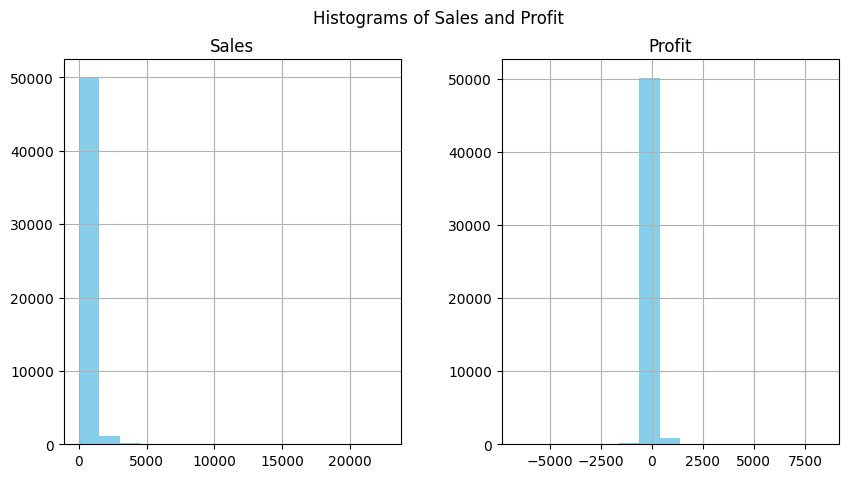

In [15]:
# A. Histograms
df[['Sales', 'Profit']].hist(bins=15, figsize=(10, 5), layout=(1, 2), color='skyblue')
plt.suptitle("Histograms of Sales and Profit")
plt.show()

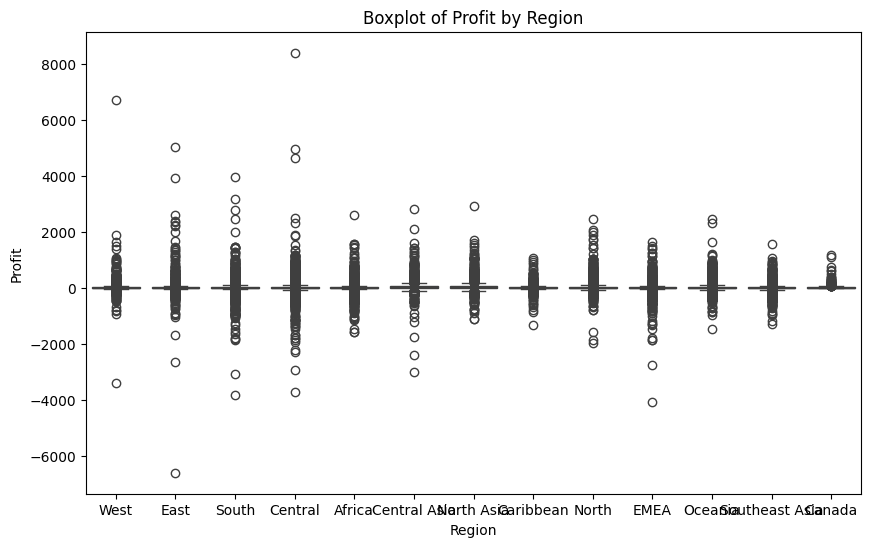

In [16]:
# B. Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Profit', data=df)
plt.title("Boxplot of Profit by Region")
plt.show()

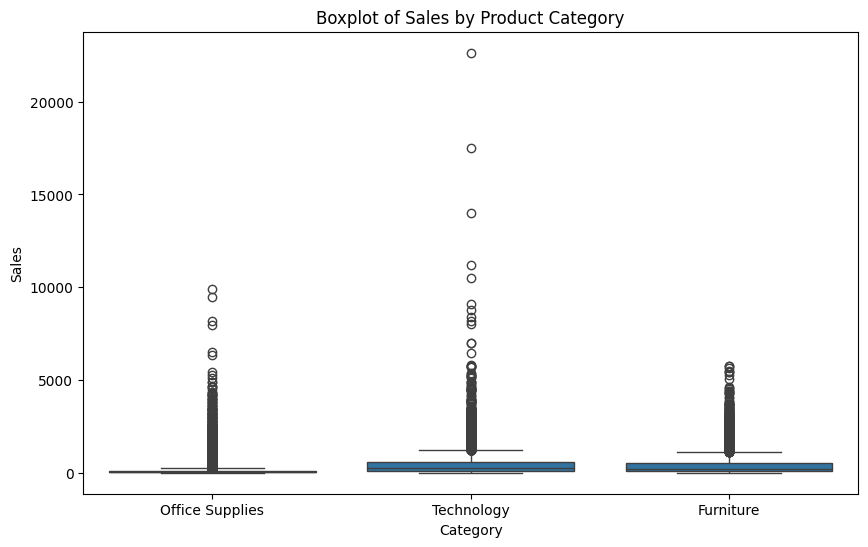

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title("Boxplot of Sales by Product Category")
plt.show()

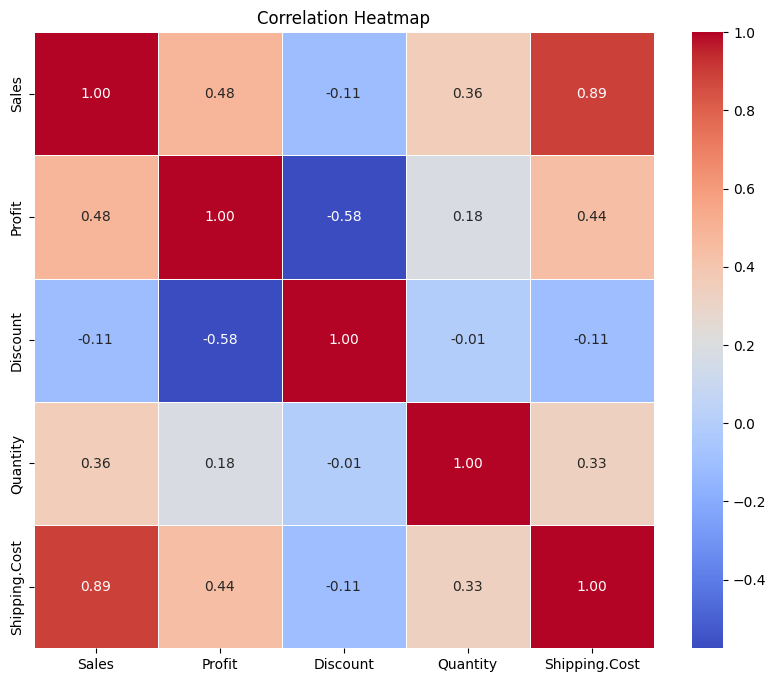

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Deliverables for Exploratory Data Analysis (EDA)

## 1. Cleaned Dataset

### Handling missing values: None were found.
### Removing duplicates: No duplicates were present.
### Handling outliers: Outliers in numerical columns (Sales, Profit, Discount, Quantity, Shipping Cost) were capped using the Interquartile Range (IQR) method.

## 2. Summary Report

## Statistical Insights
### Sales: Range between 0.0 and 581.0, with an average of 233.87.
### Profit: Values range from -55.21 to 92.02, with a mean of 14.92 and a high standard deviation indicating variability.
### Discount: Capped between 0.0 and 0.5, with no extreme discounts present.
### Quantity: Mostly between 1 and 9, with a median of 3 units per transaction.
### Shipping Cost: Ranges from 0.002 to 57.21, reflecting variations in shipping charges.
## Trends and Patterns
### Sales and Profit are positively correlated, suggesting that higher sales generally lead to higher profits.
### Discount shows a weak negative correlation with Profit, indicating over-discounting might reduce profitability.
### Shipping Cost has a negligible impact on Sales or Profit.
## Anomalies
### Some entries had unusually high values for Sales and Profit, which were identified and capped during cleaning.


## 3. Visualizations

## Histograms: Displayed the distribution of numerical columns.
### Sales and Profit had right-skewed distributions.
### Quantity showed a slight clustering around the median.
### Discounts were uniformly distributed.

## Boxplots: Highlighted outliers in raw data, which were addressed during cleaning.

## Heatmap: Showed correlations between numerical variables:
### Strong correlation: Sales and Profit (~0.62).
### Negligible correlation between Discount and other features.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
df=pd.read_csv('Sales Data.csv')
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [26]:
df.shape


(185950, 11)

In [28]:
df.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [29]:
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [31]:
df= df.drop(columns=["Unnamed: 0"], errors="ignore")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [35]:
# Remove duplicates
df.drop_duplicates()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [36]:
# Exploratory Data Analysis (EDA)
sns.set(style="whitegrid")

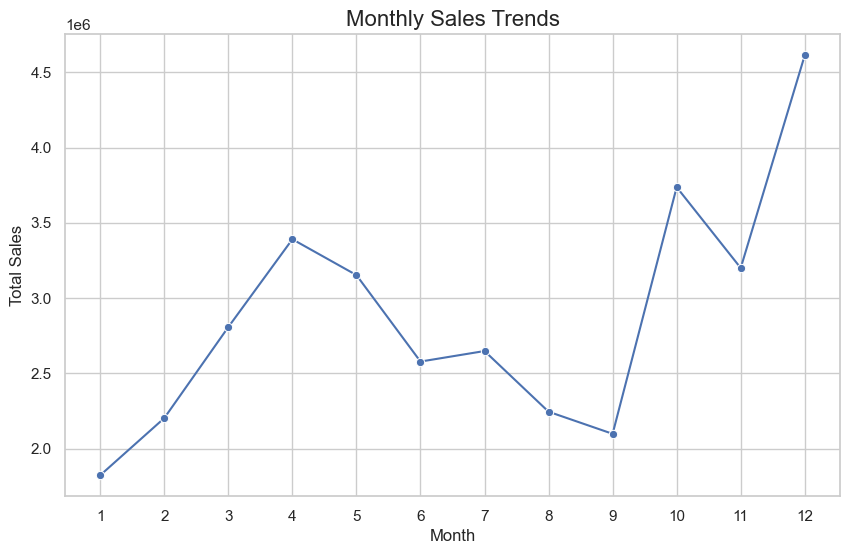

In [38]:
# Time Series Plot: Sales over Time (Monthly Sales)
monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trends", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(range(1, 13))
plt.grid(visible=True)
plt.show()

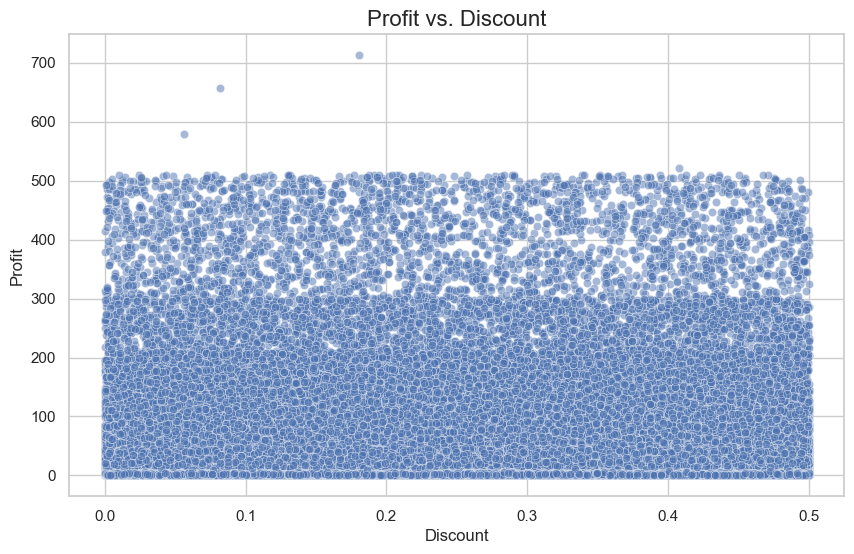

In [40]:
# Scatter Plot: Profit vs. Discount (Simulating Profit and Discount for visualization)
np.random.seed(0)
df['Profit'] = df['Sales'] * np.random.uniform(0.1, 0.3, len(df))
df['Discount'] = np.random.uniform(0, 0.5, len(df))

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Discount", y="Profit", data=df, alpha=0.5)
plt.title("Profit vs. Discount", fontsize=16)
plt.xlabel("Discount", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.show()

C:\Users\suhas\AppData\Local\Temp\ipykernel_1836\620767235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette="viridis")


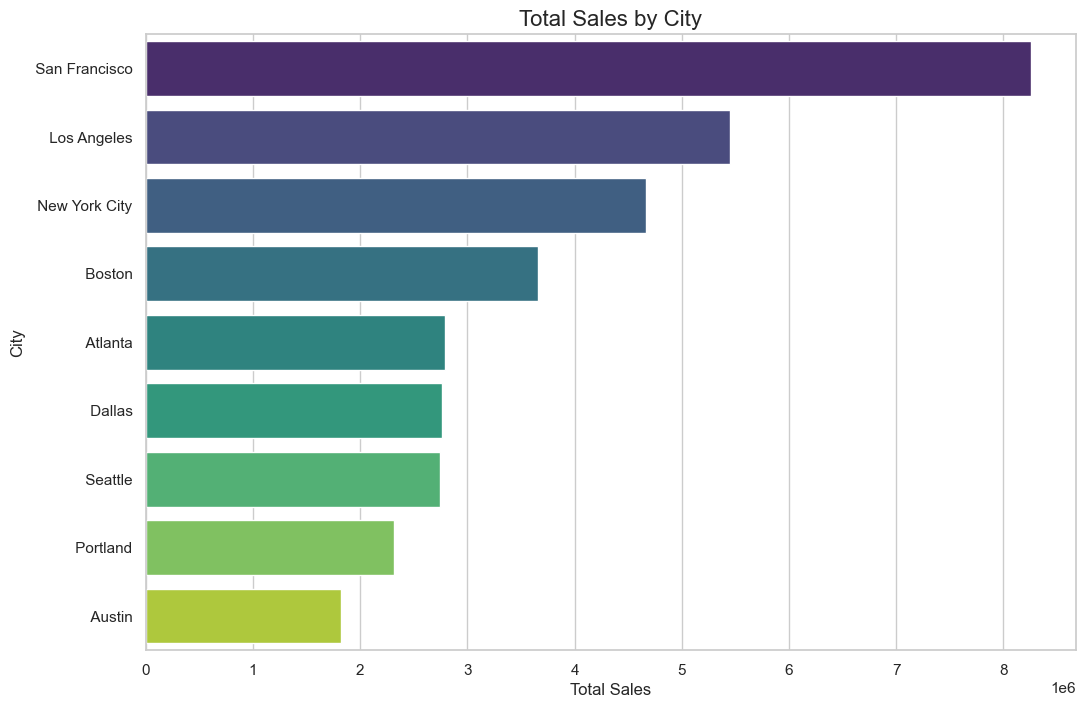

In [41]:
# Sales Distribution by Region (City)
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=city_sales.values, y=city_sales.index, palette="viridis")
plt.title("Total Sales by City", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.show()


In [42]:
# Predictive Modeling: Linear Regression
# Feature and target variables
X =df[["Profit", "Discount"]]
y = df["Sales"]

In [43]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [45]:
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print("Model Coefficients:", dict(zip(["Profit", "Discount"], model.coef_)))
print("Intercept:", model.intercept_)

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 10874.399384350529
R-squared (R²): 0.9023039334839815
Model Coefficients: {'Profit': np.float64(4.511716973903775), 'Discount': np.float64(-1.3740781012540322)}
Intercept: 18.2347667720789
